## Load the whales_2011_2012.geojson and get 2011 data.

In [3]:
import json
import pandas as pd

# Load the GeoJSON data
with open('whales_2011_2012.geojson', 'r', encoding='utf-8') as f:
    geojson_data = json.load(f)

# Extract features
features = geojson_data['features']

# Create a dataframe from properties and coordinates
records = []
for feature in features:
    props = feature.get('properties', {})
    year = props.get('year')
    if year == 2011:
        coords = feature.get('geometry', {}).get('coordinates', [None, None])
        props['longitude'] = coords[0]
        props['latitude'] = coords[1]
        records.append(props)

df_2011 = pd.DataFrame(records)

print(df_2011.shape)

# Show first few records as a check
df_2011.head()


(3972, 11)


,species,scientificName,eventDate,year,month,day,basisOfRecord,datasetName,occurrenceID,longitude,latitude
0,Tursiops truncatus,Tursiops truncatus,2011-07-29,2011,7,29,HumanObservation,Happywhale - Common bottlenose dolphin in Nort...,586003,-1.88030,48.706190
1,Tursiops truncatus,Tursiops truncatus,2011-03-15T11:56:43,2011,3,15,HumanObservation,Happywhale - Common bottlenose dolphin in Nort...,586191,-1.86016,49.433640
2,Tursiops truncatus,Tursiops truncatus,2011-03-15T12:38:51,2011,3,15,HumanObservation,Happywhale - Common bottlenose dolphin in Nort...,586101,-1.85414,49.434990
3,Tursiops truncatus,Tursiops truncatus,2011-06-26T19:09:30,2011,6,26,HumanObservation,Happywhale - Common bottlenose dolphin in Nort...,573489,-1.75326,48.846509
4,Tursiops truncatus,Tursiops truncatus,2011-07-04T14:44:02,2011,7,4,HumanObservation,Happywhale - Common bottlenose dolphin in Nort...,585981,-1.89430,48.895710


Ali sta prva dva stolpca enaka?

In [4]:
# Are 'species' and 'scientificName' in this dataset the same?
same_species = (df_2011['species'] == df_2011['scientificName'])
print(f"Number of records where they are equal: {same_species.sum()} out of {len(df_2011)}")
print(f"Are all the values the same? {same_species.all()}")
if not same_species.all():
    print("Examples where they're different:")
    diff = df_2011.loc[~same_species, ['species', 'scientificName']].drop_duplicates()
    print(diff.head())

Number of records where they are equal: 3972 out of 3972
Are all the values the same? True


Podatke lahko malo spucamo za našo uporabo:

- Prva dva stolpca ('species' in 'scientificName') sta enaka,
  zato lahko izbrišemo stolpec "species".
- Stolpca "eventDate" ne potrebujemo,
  ker imamo podatke že posebej v stolpcih "year", "month" in "day".
- "basisOfRecord" prav tako ni potreben, saj so vsi podatki rezultat opazovanja ljudi.
- Stolpec "datasetName" ne potrebujemo, ker že poznamo vir podatkov.
- "occurrenceID" je unikaten ID za opažanje in ga za analizo ne potrebujemo.

Torej odstranimo stolpce: "species", "eventDate", "basisOfRecord", "datasetName", "occurrenceID".

In [5]:
df_2011 = df_2011.drop(columns=["species", "eventDate", "basisOfRecord", "datasetName", "occurrenceID"])

df_2011.head()

,scientificName,year,month,day,longitude,latitude
0,Tursiops truncatus,2011,7,29,-1.88030,48.706190
1,Tursiops truncatus,2011,3,15,-1.86016,49.433640
2,Tursiops truncatus,2011,3,15,-1.85414,49.434990
3,Tursiops truncatus,2011,6,26,-1.75326,48.846509
4,Tursiops truncatus,2011,7,4,-1.89430,48.895710


Imamo 3972 podatkov za leto 2011. <br>

Prva dva stolpca sta ENAKA, zato lahko enega droppamo! <br>

Poglejmo, katere vrste kitov imamo:

In [6]:
whale_species = df_2011['scientificName'].unique()

print(f"Number of whale species = {len(whale_species)}")
print(whale_species)

Number of whale species = 30
['Tursiops truncatus' 'Stenella coeruleoalba' 'Delphinus delphis'
 'Physeter macrocephalus' 'Balaenoptera physalus' 'Grampus griseus'
 'Balaenoptera musculus' 'Orcinus orca' 'Phocoena phocoena' 'Delphinidae'
 'Globicephala melas' 'Stenella' 'Kogiidae' 'Cetacea'
 'Ziphius cavirostris' 'Phocoena phocoena relicta' 'Odontoceti'
 'Balaenoptera acutorostrata' 'Balaenopteridae'
 'Lagenorhynchus albirostris' 'Hyperoodon ampullatus'
 'Globicephala macrorhynchus' 'Leucopleurus acutus'
 'Tursiops truncatus ponticus' 'Megaptera novaeangliae' 'Delphinus'
 'Ziphiidae' 'Lagenorhynchus' 'Balaenoptera borealis'
 'Pseudorca crassidens']


# 1. Dataset: vsi podatki opažanj (all occurences) za kite v letu 2011. Flat array, samo vsi podatki

Imamo 30 vrst kitov. Izluščimo 3 vrste, ki imajo največ occurencev v našem datasetu:

In [7]:
species_counts = df_2011['scientificName'].value_counts()
species_counts_df = species_counts.reset_index()
species_counts_df.columns = ['scientificName', 'count']

print(species_counts_df[0:10])


               scientificName  count
0           Phocoena phocoena   1132
1       Stenella coeruleoalba    695
2           Delphinus delphis    531
3          Tursiops truncatus    340
4                 Delphinidae    195
5                   Delphinus    131
6  Balaenoptera acutorostrata    121
7       Balaenoptera physalus    110
8      Megaptera novaeangliae     96
9  Lagenorhynchus albirostris     93


**PAZI**: prvih nekaj z največjimi counti so DELFINI in ne KITI!

Te kiti imajo največ podatkov v databasu:

<ul>
<li>Balaenoptera acutorostrata</li>
<li>Balaenoptera physalus</li>
<li>Megaptera novaeangliae</li>
</ul>


Spodnja koda shrani json datoteko, ki vsebuje VSE occurance za kite. To bo uporabljeno za vizualizacijo proti koncu, kjer overlayamo vse kite naenkrat na mapo.

In [8]:
# fileter only the top 3 occuring whale species
df_2011_filtered = df_2011[df_2011['scientificName'].isin(['Balaenoptera acutorostrata', 'Balaenoptera physalus', 'Megaptera novaeangliae'])]

# save the filtered dataframe to a new file, making sure JSON lines are comma-separated and the whole output is an array
with open('whales_2011_top3_all_occurances.json', 'w') as f:
    records = df_2011_filtered.to_dict(orient='records')
    f.write('[\n')
    for i, rec in enumerate(records):
        line = json.dumps(rec)
        if i < len(records) - 1:
            f.write(line + ',\n')
        else:
            f.write(line)
    f.write('\n]')

print(df_2011_filtered.shape)

df_2011_filtered.head()

(327, 6)


,scientificName,year,month,day,longitude,latitude
41,Balaenoptera physalus,2011,7,12,6.774000,42.909833
44,Balaenoptera physalus,2011,9,8,7.144833,42.915167
45,Balaenoptera physalus,2011,9,8,7.030000,42.901667
64,Balaenoptera physalus,2011,7,1,7.220333,43.485000
69,Balaenoptera physalus,2011,9,9,7.180000,42.903333


# 2. Dataset: Centroid for each month

this dataset is computed for each month. Agregate the lon and lat for months. In the end, we should get 12 inputs in the json dataset.

```json
{
  "january": {
    "lat": float32,
    "lon": float32
  },
  // lat and lon means for each month
}
```


In [9]:
import json
import numpy as np

# Month names mapping
month_names = [
    "january", "february", "march", "april", "may", "june",
    "july", "august", "september", "october", "november", "december"
]

# Initialize result dictionary
result = {}

# Iterate over all months (0-11)
for m in range(12):
    month_name = month_names[m]
    
    # Filter data for this month
    month_data = df_2011_filtered[df_2011_filtered['month'] == m]
    
    # Calculate mean latitude and longitude for this month
    if len(month_data) > 0:
        mean_lat = float(np.mean(month_data['latitude']))
        mean_lon = float(np.mean(month_data['longitude']))
    else:
        # If no data for this month, set to NaN or None
        mean_lat = float('nan')
        mean_lon = float('nan')
    
    result[month_name] = {
        "lat": mean_lat,
        "lon": mean_lon
    }

# Save to JSON file
with open('whales_2011_monthly_centroids.json', 'w') as f:
    json.dump(result, f, indent=2)

# Display the result
print(json.dumps(result, indent=2))

{
  "january": {
    "lat": NaN,
    "lon": NaN
  },
  "february": {
    "lat": 59.943217833333335,
    "lon": 4.342177833333333
  },
  "march": {
    "lat": 66.804952,
    "lon": 14.101423999999998
  },
  "april": {
    "lat": 57.670820750000004,
    "lon": 10.841370750000001
  },
  "may": {
    "lat": 65.14421428571428,
    "lon": 10.774928571428571
  },
  "june": {
    "lat": 68.17498093750001,
    "lon": 15.308595031249997
  },
  "july": {
    "lat": 70.632468296875,
    "lon": 13.65624315625
  },
  "august": {
    "lat": 66.82012159615384,
    "lon": 4.59934625
  },
  "september": {
    "lat": 64.55157350000002,
    "lon": 6.226399323529413
  },
  "october": {
    "lat": 61.105376541666665,
    "lon": 11.861693958333333
  },
  "november": {
    "lat": 57.62672922222222,
    "lon": 5.38260388888889
  },
  "december": {
    "lat": 56.80568857142857,
    "lon": 3.883641428571429
  }
}


# 3. Dataset: Kiti agregirani po imenu, nato po mesecih

A local backend was setup with data, so I could compute localy, without needing to api fetch from our production server. The server is in the ioi-project-backend project in MAGISTERIJ/IOI map (for Tilen's computer).

Imamo 327 videvanj kitov v letu 2011. Sedaj agregiramo podatke po njihovem imenu. Ko shranimo json podatke, si želimo dostopati tako:

```json
{
  "Balaenoptera acutorostrata": {
    // next layer of data aggregates the data inside the species into months.
    "january": {
      // This is mean of all the whales in this species that were spoted in january (month = 0)
      // this variable is used to move and center the camera into the center of all whales of species spoted on this month
      "centroid": {"lon": float32, "lat": float32},

      // one entry for each occurence for this species and for this month
      "occurences": [
        {"lon": float32, "lat": float32},
        {"lon": float32, "lat": float32},
        {"lon": float32, "lat": float32},
        // ...
      ],

      // TODO: to compute the mean of both salinity and temperature, we will call an api call to our server, but for now, lets set it to 0.0.
      "mean_temperature": float32,
      "mean_salinity": float32
    },
    "february": {

    },
    
    // ... "march, "april" ... have one dictionary for each month (from january to december)
  },
  "Balaenoptera physalus": {
    // data for Balaenoptera physalus should have the same structure as the data for "Balaenoptera acutorostrata"
  },
  "Megaptera novaeangliae": {
    // data for Megaptera novaeangliae should have the same structure as the data for "Balaenoptera acutorostrata"
  }
}
```


Pripravimo si 2 helper funkciji: 
1. Vrne mean temperaturo preko lokalnega serverja, ki nam streže te podatke
2. Pretvori številko v čas, ki ga sprejme server

In [11]:
import requests


def fetch_mean_from_server(
  lon_lat_list,
  variable="thetao",
  time="2011-07-01",
  margin=1,
  depth=0,
  server_url="http://127.0.0.1:8000/mean",
):
  """
  Calls the server to fetch the mean value of specified variable for given lon/lat points.

  Args:
      lon_lat_list (list of dict): List of {"lon": float, "lat": float} for coordinates.
      variable (str): "thetao" for temperature or "so" for salinity.
      time (str): YYYY-MM-DD format date string.
      margin (float): Margin around each point (in degrees, probably).
      depth (int): Depth to query for variable.
      server_url (str): The URL of the mean API endpoint.

  Returns:
      The parsed JSON result (usually a float or dict, depending on the server response).
  """
  params = {
    "variable": variable,
    "margin": margin,
    "time": time,
    "depth": depth,
  }
  response = requests.post(server_url, params=params, json=lon_lat_list)
  response.raise_for_status()
  return response.json()


# Example usage:
# coords = [{"lon": -10, "lat": 10}, {"lon": -5, "lat": 15}]
# mean_temp = fetch_mean_from_server(coords, variable="thetao", time="2011-07-01")
# print(mean_temp)


def convert_number_to_time(number):
  """
  Convert a number to a time string in YYYY-MM-DD format.

  Args:
      number (int): The number to convert to time.

  Returns:
      str: The time string in YYYY-MM-DD format.
  """

  # this uses a day in the middle of the month, as we only have monthly data. Day is not relevant.
  return f"{2011}-{number:02d}-{15}"


convert_number_to_time(1)

'2011-01-15'

### THIS STEP TAKES ~ 80min!!

As we fetch local square of data for salinity and temperature for each occurence (around 360) this fetching takes a long time. Only compute when neccessary.

In [33]:
import json
import numpy as np

# Helper to map month number to lowercase month name
month_names = [
  "january",
  "february",
  "march",
  "april",
  "may",
  "june",
  "july",
  "august",
  "september",
  "october",
  "november",
  "december",
]

result = {}

# Use only species that occur in the current dataframe
species_list = df_2011_filtered["scientificName"].unique()
for species in species_list:
  species_dict = {}
  # iterate over all months in numerical order, as database is using 1-12 for months
  for m in range(0, 12):
    month_name = month_names[m]

    # Debug information: print what species and month is being computed
    print(f"Computing species: {species}, month: {month_name} ({m + 1})")
    # Filter rows corresponding to this species and month
    subset = df_2011_filtered[
      (df_2011_filtered["scientificName"] == species) & (df_2011_filtered["month"] == m)
    ]
    occurrences = [
      {"lon": float(row["longitude"]), "lat": float(row["latitude"])}
      for idx, row in subset.iterrows()
    ]

    # Calculate centroid if there are occurrences, otherwise set to None
    if len(occurrences) > 0:
      lon_mean = float(np.mean([o["lon"] for o in occurrences]))
      lat_mean = float(np.mean([o["lat"] for o in occurrences]))
      centroid = {"lon": lon_mean, "lat": lat_mean}
    else:
      centroid = None

    month_entry = {
      "centroid": centroid,
      "occurences": occurrences,
      # add one to the month, as m is in 0-11 range.
      "mean_temperature": (
        float("nan")
        if len(occurrences) == 0
        else fetch_mean_from_server(
          occurrences,
          variable="thetao",
          time=convert_number_to_time(m + 1),
          margin=1,
          depth=0,
        )
      ),
      "mean_salinity": float("nan")
      if len(occurrences) == 0
      else fetch_mean_from_server(
        occurrences,
        variable="so",
        time=convert_number_to_time(m + 1),
        margin=1,
        depth=0,
      ),
    }
    species_dict[month_name] = month_entry
  result[species] = species_dict

# Optionally: save to JSON file for later use
with open("whales_2011_top3_by_species_month.json", "w") as f:
  json.dump(result, f, indent=2)


Computing species: Balaenoptera physalus, month: january (1)
Computing species: Balaenoptera physalus, month: february (2)
Computing species: Balaenoptera physalus, month: march (3)
Computing species: Balaenoptera physalus, month: april (4)
Computing species: Balaenoptera physalus, month: may (5)
Computing species: Balaenoptera physalus, month: june (6)
Computing species: Balaenoptera physalus, month: july (7)
Computing species: Balaenoptera physalus, month: august (8)
Computing species: Balaenoptera physalus, month: september (9)
Computing species: Balaenoptera physalus, month: october (10)
Computing species: Balaenoptera physalus, month: november (11)
Computing species: Balaenoptera physalus, month: december (12)
Computing species: Balaenoptera acutorostrata, month: january (1)
Computing species: Balaenoptera acutorostrata, month: february (2)
Computing species: Balaenoptera acutorostrata, month: march (3)
Computing species: Balaenoptera acutorostrata, month: april (4)
Computing spec

Mean: POST /mean?variable=thetao&margin=5&time=2011-07-01&depth=0
Request body (JSON): [{"lon": -10, "lat": 10}, {"lon": -5, "lat": 15}]
Returns the mean value of the specified variable (thetao or so) computed across multiple coordinate points. For each (lon, lat) pair, creates a square region with the given margin (in degrees) around the point, computes the mean value in that region, then returns the overall mean of all computed means.

In [ ]:
import requests

# Example: Fetch mean temperature for coordinates
url = "http://127.0.0.1:8000/mean"
params = {
    "variable": "thetao",  # Use "so" for salinity
    "margin": 1, # 5 is a huge margin! Instead use 0.5 or 1 for not too big spatial square to compute mean
    "time": "2011-07-01",
    "depth": 0
}
#body = [{"lon": -10, "lat": 10}, {"lon": -5, "lat": 15}]

# Use real data, to see if it is fetching correctly
body = result["Balaenoptera physalus"]["february"]["occurences"]

response = requests.post(url, params=params, json=body)
result = response.json()
print(result)

{'mean': 17.293543301975586, 'points_processed': 2, 'total_points': 2}


## 3.1. Plot mean temperature and salinity by species and month

Visualize how mean temperature and salinity vary across months for each of the top 3 whale species.

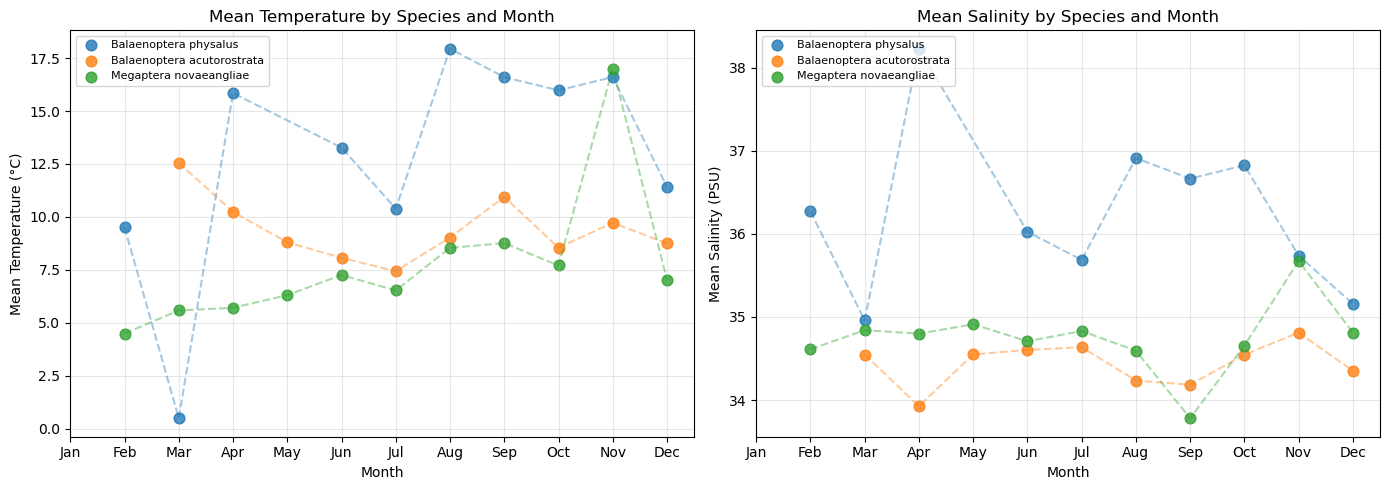

In [1]:
import json
import matplotlib.pyplot as plt

# Load the species-month data
with open('whales_2011_top3_by_species_month.json', 'r') as f:
    species_month_data = json.load(f)

month_names = [
    "january", "february", "march", "april", "may", "june",
    "july", "august", "september", "october", "november", "december"
]
month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]

# Define colors for each species
species_colors = {
    "Balaenoptera physalus": "#1f77b4",      # blue
    "Balaenoptera acutorostrata": "#ff7f0e", # orange
    "Megaptera novaeangliae": "#2ca02c"      # green
}

# Create figure with two subplots
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))

# Plot mean temperature
for species, color in species_colors.items():
    if species not in species_month_data:
        continue
    months = []
    temps = []
    for i, month in enumerate(month_names):
        data = species_month_data[species].get(month, {})
        temp_data = data.get("mean_temperature")
        if temp_data and isinstance(temp_data, dict) and "mean" in temp_data:
            months.append(i)
            temps.append(temp_data["mean"])
    ax1.scatter(months, temps, c=color, label=species, s=60, alpha=0.8)
    ax1.plot(months, temps, c=color, alpha=0.4, linestyle='--')

ax1.set_xlabel("Month")
ax1.set_ylabel("Mean Temperature (°C)")
ax1.set_title("Mean Temperature by Species and Month")
ax1.set_xticks(range(12))
ax1.set_xticklabels(month_labels)
ax1.legend(loc='upper left', fontsize=8)
ax1.grid(True, alpha=0.3)

# Plot mean salinity
for species, color in species_colors.items():
    if species not in species_month_data:
        continue
    months = []
    salinity = []
    for i, month in enumerate(month_names):
        data = species_month_data[species].get(month, {})
        sal_data = data.get("mean_salinity")
        if sal_data and isinstance(sal_data, dict) and "mean" in sal_data:
            months.append(i)
            salinity.append(sal_data["mean"])
    ax2.scatter(months, salinity, c=color, label=species, s=60, alpha=0.8)
    ax2.plot(months, salinity, c=color, alpha=0.4, linestyle='--')

ax2.set_xlabel("Month")
ax2.set_ylabel("Mean Salinity (PSU)")
ax2.set_title("Mean Salinity by Species and Month")
ax2.set_xticks(range(12))
ax2.set_xticklabels(month_labels)
ax2.legend(loc='upper left', fontsize=8)
ax2.grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

# 4. Dataset: delitev kitov glede na morja

Europe: Top_left: (lat: 29, lon: -15), Bottom_right: (lat: 72, lon: 45) 

North Atlantic: Top_left (lat: 30, lon: -80), Bottom_right (lat: 75, lon: 20)

Json bo izgledal takole:

```json
{
  "Europe": [
    {
      "scientificName": string,
      "year": int,
      "month": int,
      "day": int,
      "lan": float32,
      "lon": float32
    },
    // next whale that falls into Europe bounds
  ],
  "North_Atlantic": [
    // Same as Europe format, but for whales that fall into North Atlantic bounds
  ]
}
```

In [8]:
# Define region bounds
# Europe: Top_left: (lat: 29, lon: -15), Bottom_right: (lat: 72, lon: 45)
europe_lat_min, europe_lat_max = 29, 72
europe_lon_min, europe_lon_max = -15, 45

# North Atlantic: Top_left (lat: 30, lon: -80), Bottom_right (lat: 75, lon: 20)
north_atlantic_lat_min, north_atlantic_lat_max = 30, 75
north_atlantic_lon_min, north_atlantic_lon_max = -80, 20

# Filter whales by region
europe_whales = df_2011[
    (df_2011['latitude'] >= europe_lat_min) & (df_2011['latitude'] <= europe_lat_max) &
    (df_2011['longitude'] >= europe_lon_min) & (df_2011['longitude'] <= europe_lon_max)
]

north_atlantic_whales = df_2011[
    (df_2011['latitude'] >= north_atlantic_lat_min) & (df_2011['latitude'] <= north_atlantic_lat_max) &
    (df_2011['longitude'] >= north_atlantic_lon_min) & (df_2011['longitude'] <= north_atlantic_lon_max)
]

# Rename columns longitude and latitude to keep consistency with the other datasets
europe_out = europe_whales.rename(columns={'longitude': 'lon', 'latitude': 'lat'})
north_atlantic_out = north_atlantic_whales.rename(columns={'longitude': 'lon', 'latitude': 'lat'})

# Convert to JSON format with only scientificName, year, month, day, lon, lat
result = {
    "Europe": europe_out[['scientificName', 'year', 'month', 'day', 'lon', 'lat']].to_dict(orient='records'),
    "North_Atlantic": north_atlantic_out[['scientificName', 'year', 'month', 'day', 'lon', 'lat']].to_dict(orient='records')
}

# Save to JSON file
with open('whales_2011_by_region.json', 'w') as f:
    json.dump(result, f, indent=2)

print(f"Europe whales: {len(result['Europe'])}")
print(f"North Atlantic whales: {len(result['North_Atlantic'])}")
print(f"Total unique whales in dataset: {len(df_2011)}")

Europe whales: 3610
North Atlantic whales: 3891
Total unique whales in dataset: 3972


# 5. Podatki za povprečno temperaturo evrope za vsak mesec

Naredimo api call z nekim večjim stridom za cel svet. Za temperaturo in salinity. Europe bounds so definirani v code cellu zgoraj, europe_lat_min, europe_lat_max, europe_lon_min, europe_lon_max.


For the world, fetch with stride 2, as stride 1 is too big and can't be fetched. For europe, use europe_lat_min, europe_lat_max, europe_lon_min, europe_lon_max variables to define what spatial slice of data we want to fetch. Also use stride 2 for europe, to keep the data sparsity consistent. Call the /subset api call on the server and get the data for world and europe, for each month. Mean the returned data and this is our datapoint in the dataset.

```json
{
  "january": {
    "world": {
      "mean_temperature": float32,
      "mean_salinity": float32
    },
    "europe": {
      "mean_temperature": float32,
      "mean_salinity": float32
    }
  },
  // for each month to december
}
```


In [24]:
import requests

# API endpoint
url = "http://127.0.0.1:8000/mean-region"

# Parameters for January world temperature data
params = {
    "region": "world",
    "variable": "thetao",  # temperature
    "time": "2011-01",     # January 2011 (can also use "2011-01-15")
    "stride": 8            # Every 4th point (recommended for world data to avoid size limits)
}

# Make the request
response = requests.get(url, params=params)
response.raise_for_status()  # Raises an exception for bad status codes

# Get the result
result = response.json()
print(result)

{'region': 'world', 'variable': 'thetao', 'time': '2011-01', 'mean': 13.850968394800013, 'stride': 8}


**PAZI**: spodnje podatke loada 1H!!

In [31]:
import requests

# Set up
api_url = "http://127.0.0.1:8000/mean-region"
months = [f"{m:02d}" for m in range(1, 13)]  # '01' to '12'
year = "2011"

# Use stride 8 for world and stride 2 for europe for sparsity consistency
# (change stride here globally if wanted for both)
strides = {"world": 8, "europe": 4}
variables = ["thetao", "so"]  # thetao = temperature, so = salinity

dataset = {}

for month in months:
    time_str = f"{year}-{month}"
    dataset[month] = {"world": {}, "europe": {}}
    for region in ["world", "europe"]:
        print(f"Fetching data for month {month}, region {region}...")
        entry = {}
        for variable in variables:
            print(f"  Waiting for variable '{variable}'...")
            params = {
                "region": region,
                "variable": variable,
                "time": time_str,
                "stride": strides[region],
            }
            r = requests.get(api_url, params=params)
            r.raise_for_status()
            mean_val = r.json().get("mean")
            # Save with proper label
            if variable == "thetao":
                entry["mean_temperature"] = mean_val
            elif variable == "so":
                entry["mean_salinity"] = mean_val
        dataset[month][region] = entry

import json
print(json.dumps(dataset, indent=2))

Fetching data for month 01, region world...
  Waiting for variable 'thetao'...
  Waiting for variable 'so'...
Fetching data for month 01, region europe...
  Waiting for variable 'thetao'...
  Waiting for variable 'so'...
Fetching data for month 02, region world...
  Waiting for variable 'thetao'...
  Waiting for variable 'so'...
Fetching data for month 02, region europe...
  Waiting for variable 'thetao'...
  Waiting for variable 'so'...
Fetching data for month 03, region world...
  Waiting for variable 'thetao'...
  Waiting for variable 'so'...
Fetching data for month 03, region europe...
  Waiting for variable 'thetao'...
  Waiting for variable 'so'...
Fetching data for month 04, region world...
  Waiting for variable 'thetao'...
  Waiting for variable 'so'...
Fetching data for month 04, region europe...
  Waiting for variable 'thetao'...
  Waiting for variable 'so'...
Fetching data for month 05, region world...
  Waiting for variable 'thetao'...
  Waiting for variable 'so'...
Fetchi

In [32]:
# Convert month numbers to month names and save dataset to JSON
month_names = [
    "january", "february", "march", "april", "may", "june",
    "july", "august", "september", "october", "november", "december"
]

# Convert dataset from month numbers ("01"-"12") to month names
dataset_with_month_names = {}
for i, month_num in enumerate(months, start=1):
    month_name = month_names[i - 1]
    if month_num in dataset:
        dataset_with_month_names[month_name] = dataset[month_num]

# Save to JSON file
output_filename = "europe_world_monthly_temperature_salinity.json"
with open(output_filename, "w") as f:
    json.dump(dataset_with_month_names, f, indent=2)

print(f"Dataset saved to {output_filename}")
print(f"Saved data for {len(dataset_with_month_names)} months")

Dataset saved to europe_world_monthly_temperature_salinity.json
Saved data for 12 months


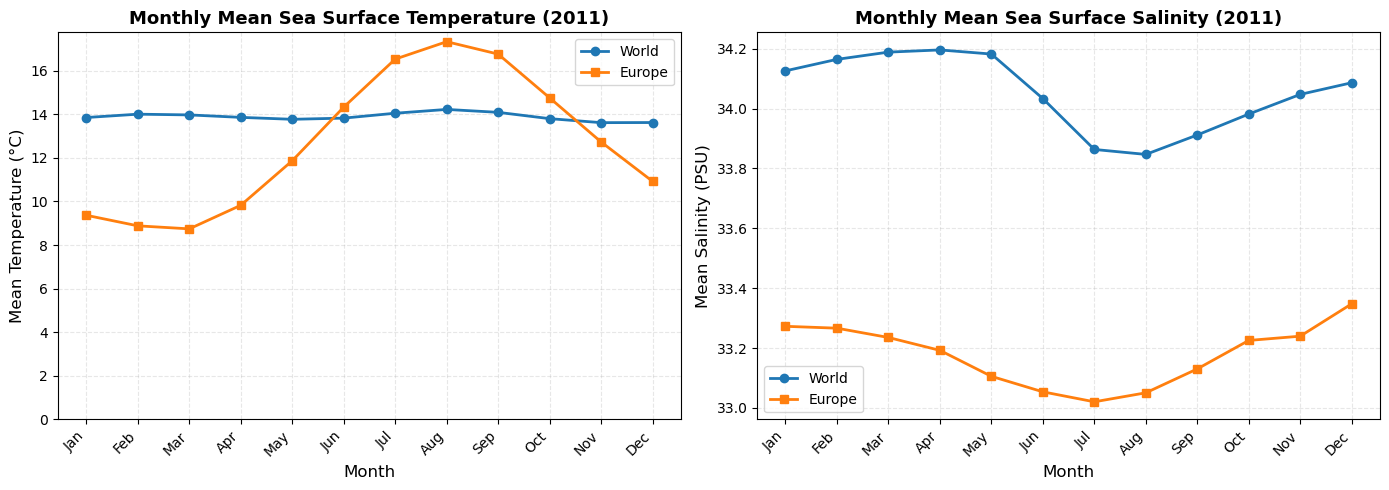


Summary Statistics:
World Temperature - Min: 13.62°C, Max: 14.22°C, Mean: 13.89°C
Europe Temperature - Min: 8.74°C, Max: 17.33°C, Mean: 12.67°C
World Salinity - Min: 33.85 PSU, Max: 34.20 PSU, Mean: 34.05 PSU
Europe Salinity - Min: 33.02 PSU, Max: 33.35 PSU, Mean: 33.18 PSU


In [33]:
import json
import matplotlib.pyplot as plt
import numpy as np

def plot_europe_world_temperature_salinity(json_file="europe_world_monthly_temperature_salinity.json"):
    """
    Plot monthly mean temperature and salinity for world and Europe regions.
    
    Args:
        json_file (str): Path to the JSON file containing the data
    """
    # Load the data
    with open(json_file, 'r') as f:
        data = json.load(f)
    
    # Month names in order
    month_names = [
        "january", "february", "march", "april", "may", "june",
        "july", "august", "september", "october", "november", "december"
    ]
    month_labels = ["Jan", "Feb", "Mar", "Apr", "May", "Jun", 
                    "Jul", "Aug", "Sep", "Oct", "Nov", "Dec"]
    
    # Extract data for plotting
    world_temps = []
    europe_temps = []
    world_sal = []
    europe_sal = []
    
    for month in month_names:
        if month in data:
            world_temps.append(data[month]["world"]["mean_temperature"])
            europe_temps.append(data[month]["europe"]["mean_temperature"])
            world_sal.append(data[month]["world"]["mean_salinity"])
            europe_sal.append(data[month]["europe"]["mean_salinity"])
    
    # Create figure with two subplots
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 5))
    
    # Plot temperature
    x = np.arange(len(month_names))
    ax1.plot(x, world_temps, marker='o', label='World', linewidth=2, markersize=6)
    ax1.plot(x, europe_temps, marker='s', label='Europe', linewidth=2, markersize=6)
    ax1.set_xlabel('Month', fontsize=12)
    ax1.set_ylabel('Mean Temperature (°C)', fontsize=12)
    ax1.set_title('Monthly Mean Sea Surface Temperature (2011)', fontsize=13, fontweight='bold')
    ax1.set_xticks(x)
    ax1.set_xticklabels(month_labels, rotation=45, ha='right')
    ax1.legend(loc='best', fontsize=10)
    ax1.grid(True, alpha=0.3, linestyle='--')
    ax1.set_ylim(bottom=0)  # Start y-axis from 0 for better visualization
    
    # Plot salinity
    ax2.plot(x, world_sal, marker='o', label='World', linewidth=2, markersize=6)
    ax2.plot(x, europe_sal, marker='s', label='Europe', linewidth=2, markersize=6)
    ax2.set_xlabel('Month', fontsize=12)
    ax2.set_ylabel('Mean Salinity (PSU)', fontsize=12)
    ax2.set_title('Monthly Mean Sea Surface Salinity (2011)', fontsize=13, fontweight='bold')
    ax2.set_xticks(x)
    ax2.set_xticklabels(month_labels, rotation=45, ha='right')
    ax2.legend(loc='best', fontsize=10)
    ax2.grid(True, alpha=0.3, linestyle='--')
    
    plt.tight_layout()
    plt.show()
    
    # Print summary statistics
    print("\nSummary Statistics:")
    print(f"World Temperature - Min: {min(world_temps):.2f}°C, Max: {max(world_temps):.2f}°C, Mean: {np.mean(world_temps):.2f}°C")
    print(f"Europe Temperature - Min: {min(europe_temps):.2f}°C, Max: {max(europe_temps):.2f}°C, Mean: {np.mean(europe_temps):.2f}°C")
    print(f"World Salinity - Min: {min(world_sal):.2f} PSU, Max: {max(world_sal):.2f} PSU, Mean: {np.mean(world_sal):.2f} PSU")
    print(f"Europe Salinity - Min: {min(europe_sal):.2f} PSU, Max: {max(europe_sal):.2f} PSU, Mean: {np.mean(europe_sal):.2f} PSU")

# Call the function to plot
plot_europe_world_temperature_salinity()